In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import VarianceThreshold
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy.stats import ttest_ind
from sklearn.metrics import mean_squared_error, r2_score

In [67]:
df = pd.read_csv("student-mat.csv", sep=";")





In [46]:
u = df.replace({'yes' : 1, 'no' : 0})
le = LabelEncoder()
for col in u.select_dtypes(include=['object']):
    if u[col].nunique() == 2:
        u[col] = le.fit_transform(u[col])
    elif u[col].nunique() > 2:
        u = pd.get_dummies(u, columns=[col])



In [49]:
pd.set_option('display.max_columns', None)

correlation = u.corr()["G3"].sort_values(ascending=False)
correlation

G3                   1.000000
G2                   0.904868
G1                   0.801468
Medu                 0.217147
higher               0.182465
Fedu                 0.152457
Mjob_health          0.116158
address              0.105756
sex                  0.103456
paid                 0.101996
internet             0.098483
studytime            0.097820
reason_reputation    0.095692
Fjob_teacher         0.095374
famsize              0.081407
Mjob_services        0.078429
Mjob_teacher         0.057712
Fjob_health          0.057111
reason_other         0.052008
nursery              0.051568
famrel               0.051363
absences             0.034247
guardian_father      0.032493
guardian_mother      0.022338
activities           0.016100
freetime             0.011307
Fjob_at_home        -0.013385
Fjob_services       -0.016108
reason_home         -0.021359
famsup              -0.039157
school              -0.045017
Walc                -0.051939
Fjob_other          -0.053483
Dalc      

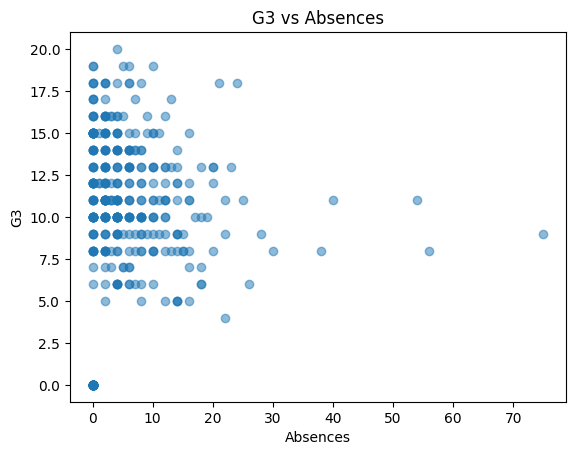

In [54]:
plt.scatter(u['absences'], u['G3'], alpha=0.5)
plt.xlabel("Absences")
plt.ylabel("G3")
plt.title("G3 vs Absences")
plt.show()

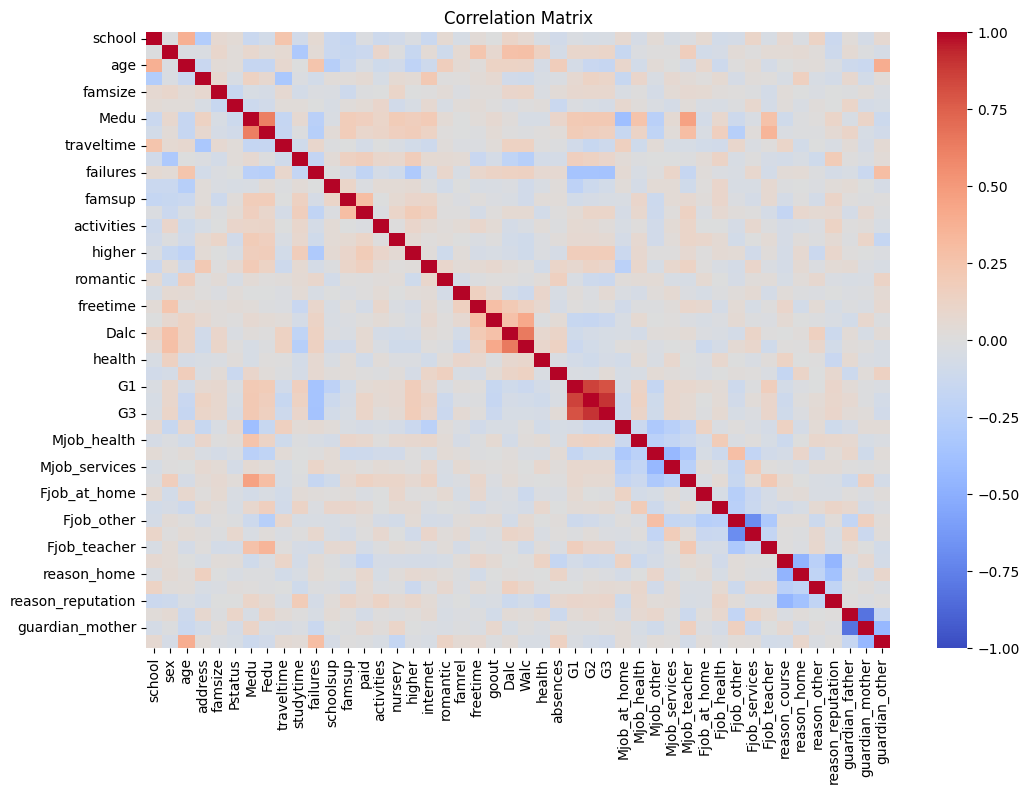

In [68]:
# Compute the correlation matrix
correlation_matrix = u.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()



In [69]:
# Compute the correlation matrix
correlation_matrix = u.corr()

# Define the target column (e.g., 'G3')
target_col = 'G3'

# Select columns where the absolute correlation with the target is less than 0.03
low_correlation_cols = correlation_matrix[abs(correlation_matrix[target_col]) < 0.03].index

# Drop the columns with low correlation
df_cleaned = u.drop(columns=low_correlation_cols)

# Display the cleaned dataframe
print(df_cleaned)

     school  sex  age  address  famsize  Pstatus  Medu  Fedu  traveltime  \
0         0    0   18        1        0        0     4     4           2   
1         0    0   17        1        0        1     1     1           1   
2         0    0   15        1        1        1     1     1           1   
3         0    0   15        1        0        1     4     2           1   
4         0    0   16        1        0        1     3     3           1   
..      ...  ...  ...      ...      ...      ...   ...   ...         ...   
390       1    1   20        1        1        0     2     2           1   
391       1    1   17        1        1        1     3     1           2   
392       1    1   21        0        0        1     1     1           1   
393       1    1   18        0        1        1     3     2           3   
394       1    1   19        1        1        1     1     1           1   

     studytime  failures  schoolsup  famsup  paid  nursery  higher  internet  \
0      

In [74]:
# Replace 'binary_column' with the name of the binary column
binary_columns = [col for col in df_cleaned.columns if df_cleaned[col].nunique() == 2]

# Calculate the mean of the target variable (e.g., G3) for each value of the binary columns
# for col in binary_columns:
#     print(f"Effect of {col} on G3:")
#     print(df_cleaned.groupby(col)['G3'].mean())  # Mean of G3 grouped by the binary column value
#     print()

# Perform a t-test
for col in binary_columns:
    group_0 = df_cleaned[df_cleaned[col] == 0]['G3']
    group_1 = df_cleaned[df_cleaned[col] == 1]['G3']

    t_stat, p_value = ttest_ind(group_0, group_1)
    if 0.05 <= p_value:
        df_cleaned.drop(col, axis= 1, inplace= True)

In [ ]:
low_correlation_cols = df_cleaned.corr()['G3'][abs(df_cleaned.corr()['G3']) < 0.05].index
df_cleaned = df_cleaned.drop(low_correlation_cols, axis=1)

,sex,age,address,Medu,Fedu,traveltime,studytime,failures,paid,higher,romantic,famrel,goout,Dalc,Walc,health,G1,G2,G3,Mjob_at_home,Mjob_health,reason_course
0,0,18,1,4,4,2,2,0,0,1,0,4,4,1,1,3,5,6,6,True,False,True
1,0,17,1,1,1,1,2,0,0,1,0,5,3,1,1,3,5,5,6,True,False,True
2,0,15,1,1,1,1,2,3,1,1,0,4,2,2,3,3,7,8,10,True,False,False
3,0,15,1,4,2,1,3,0,1,1,1,3,2,1,1,5,15,14,15,False,True,False
4,0,16,1,3,3,1,2,0,1,1,0,4,2,1,2,5,6,10,10,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,20,1,2,2,1,2,2,1,1,0,5,4,4,5,4,9,9,9,False,False,True
391,1,17,1,3,1,2,1,0,0,1,0,2,5,3,4,2,14,16,16,False,False,True
392,1,21,0,1,1,1,1,3,0,1,0,5,3,3,3,3,10,8,7,False,False,True
393,1,18,0,3,2,3,1,0,0,1,0,4,1,3,4,5,11,12,10,False,False,True


In [152]:
X = np.array(df_cleaned.drop('G3', axis=1))  
y = np.array(df_cleaned['G3'])

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

model = LinearRegression()
model.fit(x_train, y_train)



LinearRegression()

In [156]:
# Model evaluation on training data
train_acc = model.score(x_train, y_train)
print(f"Training Accuracy: {train_acc}")

# Model evaluation on test data
test_acc = model.score(x_test, y_test)
print(f"Test Accuracy: {test_acc}")

# Predict and calculate MSE for both
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print(f"Training MSE: {mse_train}")
print(f"Test MSE: {mse_test}")

Training Accuracy: 0.8320958584154058
Test Accuracy: 0.8392275164096469
Training MSE: 3.4311785890725397
Test MSE: 4.028857955972005
